<a href="https://colab.research.google.com/github/bbchen33/Deep-learning/blob/master/Tensorflow-small-image-cifar10-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

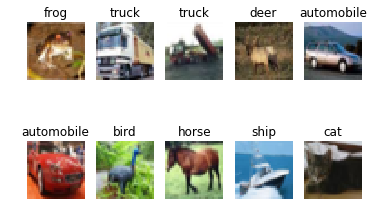

In [73]:
for i in range(10):
  plt.subplot(2,5,i+1)  
  plt.imshow(X_train[i,:,:,:])
  plt.title(labels[int(y_train[i])])
  plt.axis('off')

In [5]:
print(X_train.max())
print(X_train.min())
X_train_normal = X_train/255
print(X_train_normal.max())


255
0
1.0


Normalize by dividing 255 (max value of the pixels)

In [0]:
X_test_normal = X_test/255

In [0]:
y_train_category = tf.keras.utils.to_categorical(y_train, 10)
y_test_category = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
print(y_train_category[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),    
    tf.keras.layers.Dense(10, activation = 'softmax')    
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 10, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 12s 312us/sample - loss: 1.9100 - acc: 0.3068 - val_loss: 1.7441 - val_acc: 0.3756
Epoch 2/10
40000/40000 [==============================] - 12s 308us/sample - loss: 1.6915 - acc: 0.3948 - val_loss: 1.6531 - val_acc: 0.4122
Epoch 3/10
40000/40000 [==============================] - 12s 304us/sample - loss: 1.6037 - acc: 0.4256 - val_loss: 1.5933 - val_acc: 0.4341
Epoch 4/10
40000/40000 [==============================] - 12s 309us/sample - loss: 1.5516 - acc: 0.4430 - val_loss: 1.5720 - val_acc: 0.4444
Epoch 5/10
40000/40000 [==============================] - 12s 301us/sample - loss: 1.5003 - acc: 0.4647 - val_loss: 1.5521 - val_acc: 0.4584
Epoch 6/10
40000/40000 [==============================] - 12s 302us/sample - loss: 1.4647 - acc: 0.4756 - val_loss: 1.5006 - val_acc: 0.4701
Epoch 7/10
40000/40000 [==============================] - 12s 300us/sample - loss: 1.4304 - acc: 0.4873 

In [0]:
def training_progress(model, history):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['acc'], label = 'train_accuracy')
  plt.plot(history.history['val_acc'], label = 'val_accuracy')
  plt.title('Accuracy')
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.title('Loss')  
  plt.legend()
  plt.show()

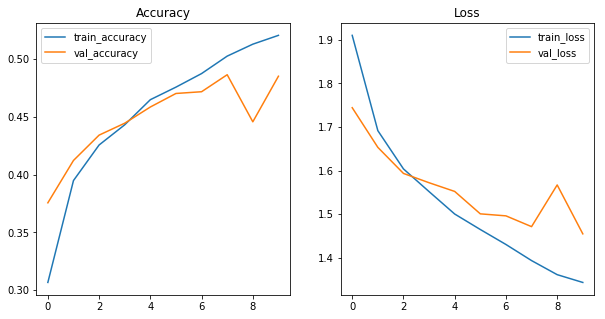

10000/10000 [==============================] - 2s 200us/sample - loss: 204.0157 - acc: 0.4434
Trained with dense layers gives test accuracy of: 0.4434


In [14]:
training_progress(model, history)
print('Trained with dense layers gives test accuracy of:',model.evaluate(X_test_normal, y_test_category)[1])

The model trained with only dense layers did not seem to be able to give good accuracy.

In [8]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history2 = model2.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 10, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 12s 297us/sample - loss: 1.5618 - acc: 0.4547 - val_loss: 1.2913 - val_acc: 0.5526
Epoch 2/10
40000/40000 [==============================] - 8s 206us/sample - loss: 1.1668 - acc: 0.5921 - val_loss: 1.1681 - val_acc: 0.5895
Epoch 3/10
40000/40000 [==============================] - 8s 209us/sample - loss: 1.0286 - acc: 0.6413 - val_loss: 1.0906 - val_acc: 0.6232
Epoch 4/10
40000/40000 [==============================] - 8s 208us/sample - loss: 0.9067 - acc: 0.6828 - val_loss: 1.0265 - val_acc: 0.6481
Epoch 5/10
40000/40000 [==============================] - 8s 207us/sample - loss: 0.8057 - acc: 0.7189 - val_loss: 1.0180 - val_acc: 0.6507
Epoch 6/10
40000/40000 [==============================] - 8s 207us/sample - loss: 0.6996 - acc: 0.7577 - val_loss: 1.0472 - val_acc: 0.6495
Epoch 7/10
40000/40000 [==============================] - 8s 207us/sample - loss: 0.6041 - acc: 0.7925 - val_

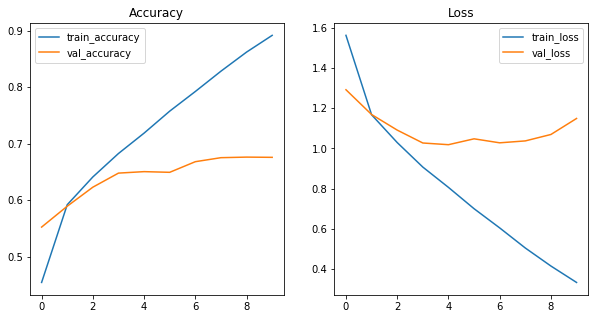

10000/10000 [==============================] - 2s 191us/sample - loss: 1.1665 - acc: 0.6640
Trained with CNN gives test accuracy of: 0.664


In [14]:
training_progress(model2, history2)
print('Trained with CNN gives test accuracy of:',model2.evaluate(X_test_normal, y_test_category)[1])

The accuracy for the train set is very good but not good for the test set. It's clear that the model is overfitting the training data. Let's try adding a dropout to turn off half of the nodes.

In [0]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history3 = model3.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 10, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 9s 237us/sample - loss: 1.6109 - acc: 0.4365 - val_loss: 1.3190 - val_acc: 0.5378
Epoch 2/10
40000/40000 [==============================] - 9s 232us/sample - loss: 1.2526 - acc: 0.5560 - val_loss: 1.2146 - val_acc: 0.5780
Epoch 3/10
40000/40000 [==============================] - 9s 232us/sample - loss: 1.1207 - acc: 0.6071 - val_loss: 1.1316 - val_acc: 0.6059
Epoch 4/10
40000/40000 [==============================] - 9s 232us/sample - loss: 1.0303 - acc: 0.6380 - val_loss: 1.0607 - val_acc: 0.6331
Epoch 5/10
40000/40000 [==============================] - 9s 232us/sample - loss: 0.9519 - acc: 0.6665 - val_loss: 1.0297 - val_acc: 0.6454
Epoch 6/10
40000/40000 [==============================] - 9s 232us/sample - loss: 0.8735 - acc: 0.6928 - val_loss: 0.9866 - val_acc: 0.6637
Epoch 7/10
40000/40000 [==============================] - 9s 234us/sample - loss: 0.8036 - acc: 0.7185 - val_l

Adding complexity to the model to see if it can improve the learning.

In [0]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(500, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history4 = model4.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 5, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 11s 266us/sample - loss: 2.6538 - acc: 0.2430 - val_loss: 1.7851 - val_acc: 0.3296
Epoch 2/5
40000/40000 [==============================] - 10s 249us/sample - loss: 1.7532 - acc: 0.3466 - val_loss: 1.6577 - val_acc: 0.3932
Epoch 3/5
40000/40000 [==============================] - 10s 247us/sample - loss: 1.6191 - acc: 0.4032 - val_loss: 1.6009 - val_acc: 0.4223
Epoch 4/5
40000/40000 [==============================] - 10s 246us/sample - loss: 1.5530 - acc: 0.4306 - val_loss: 1.5223 - val_acc: 0.4503
Epoch 5/5
40000/40000 [==============================] - 10s 248us/sample - loss: 1.4785 - acc: 0.4586 - val_loss: 1.4946 - val_acc: 0.4642


Now the validation score is better than the training set. That means our model is not just memorizing the dataset. Now I can try the same model with more epochs to see if it reaches a better accuracy for the test set.

In [20]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history4 = model4.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 15, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 10s 255us/sample - loss: 1.4047 - acc: 0.4970 - val_loss: 1.3389 - val_acc: 0.5293
Epoch 2/15
40000/40000 [==============================] - 10s 247us/sample - loss: 1.2698 - acc: 0.5490 - val_loss: 1.1917 - val_acc: 0.5830
Epoch 3/15
40000/40000 [==============================] - 10s 246us/sample - loss: 1.1676 - acc: 0.5870 - val_loss: 1.2123 - val_acc: 0.5852
Epoch 4/15
40000/40000 [==============================] - 10s 248us/sample - loss: 1.0885 - acc: 0.6161 - val_loss: 1.0891 - val_acc: 0.6250
Epoch 5/15
40000/40000 [==============================] - 10s 243us/sample - loss: 1.0279 - acc: 0.6387 - val_loss: 1.0758 - val_acc: 0.6325
Epoch 6/15
40000/40000 [==============================] - 10s 245us/sample - loss: 0.9736 - acc: 0.6558 - val_loss: 1.0174 - val_acc: 0.6519
Epoch 7/15
40000/40000 [==============================] - 10s 245us/sample - loss: 0.9214 - acc: 0.6739 

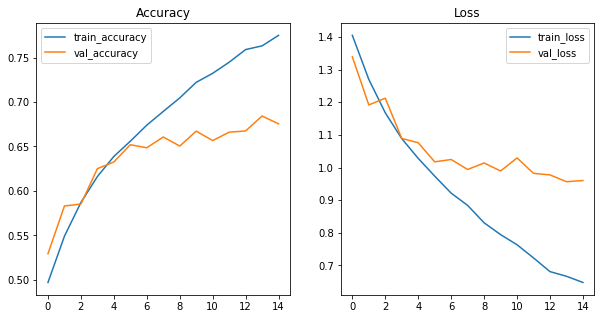

10000/10000 [==============================] - 2s 218us/sample - loss: 0.9787 - acc: 0.6671
Trained with CNN gives test accuracy of: 0.6671


In [21]:
training_progress(model4, history4)
print('Trained with CNN gives test accuracy of:',model4.evaluate(X_test_normal, y_test_category)[1])

It's better than before but the accuracy of 0.67 on the test set can still be improved. Now I'm going to do data augmentation to prevent the model from memorizing the train data.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale =1./255,rotation_range = 30, width_shift_range = 0.2, horizontal_flip = True,validation_split = 0.2)


In [0]:
processed_train = datagen.flow(X_train[:40000], y_train_category[:40000], batch_size =32, shuffle=True)
processed_val = datagen.flow(X_train[40000:], y_train_category[40000:], batch_size =32, shuffle=True)

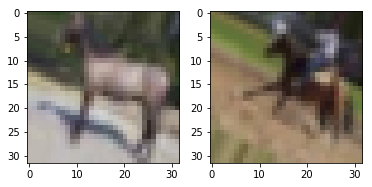

In [106]:
plt.subplot(1,2,1)
plt.imshow(processed_X_train[0][0][0])
plt.subplot(1,2,2)
plt.imshow(processed_X_train[0][0][1])

In [113]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history5 = model4.fit_generator(processed_train, epochs = 20, validation_data = processed_val)

Epoch 1/20
1250/1250 [==============================] - 40s 32ms/step - loss: 1.3048 - acc: 0.5328 - val_loss: 1.2474 - val_acc: 0.5610
Epoch 2/20
1250/1250 [==============================] - 39s 32ms/step - loss: 1.2927 - acc: 0.5420 - val_loss: 1.2089 - val_acc: 0.5709
Epoch 3/20
1250/1250 [==============================] - 39s 31ms/step - loss: 1.2692 - acc: 0.5483 - val_loss: 1.2267 - val_acc: 0.5726
Epoch 4/20
1250/1250 [==============================] - 40s 32ms/step - loss: 1.2558 - acc: 0.5505 - val_loss: 1.1975 - val_acc: 0.5792
Epoch 5/20
1250/1250 [==============================] - 40s 32ms/step - loss: 1.2504 - acc: 0.5538 - val_loss: 1.1893 - val_acc: 0.5817
Epoch 6/20
1250/1250 [==============================] - 40s 32ms/step - loss: 1.2287 - acc: 0.5645 - val_loss: 1.1911 - val_acc: 0.5850
Epoch 7/20
1250/1250 [==============================] - 40s 32ms/step - loss: 1.2147 - acc: 0.5727 - val_loss: 1.1661 - val_acc: 0.5845
Epoch 8/20
1250/1250 [==========================

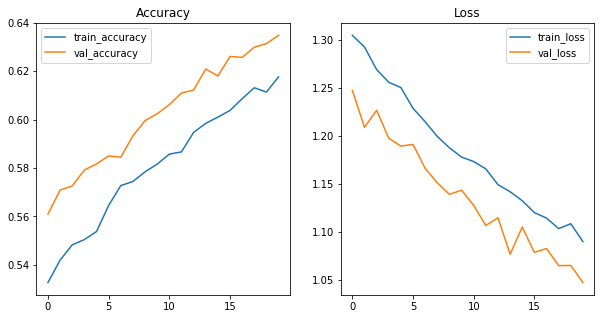

10000/10000 [==============================] - 2s 220us/sample - loss: 1.0270 - acc: 0.6476
Trained with CNN gives test accuracy of: 0.6476


In [114]:
training_progress(model4, history5)
print('Trained with CNN gives test accuracy of:',model4.evaluate(X_test_normal, y_test_category)[1])

Now this looks like the model can make good prediction with sufficient training.